# import libraries

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [349]:
cols = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi','ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
df = pd.read_csv("cardio_train.csv", delimiter = ';' ,header=None, skiprows=1, names=cols)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [350]:
df2 = df.drop(columns=['id'])
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data analysis and Processing

**Convert age column from no of Dates to no of years**

In [351]:
df2['age'] = (df['age']/365.25).astype(int)
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [352]:
df2.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762462,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Add a column BMI that contains Body Mass Index of the person**

In [353]:
df2['BMI'] = (df2['weight']/(df2['height']*df2['height']))*10000
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


### BMI Range
- below 18.5 underweight
- 18.5-24.9 healthy weight
- 25-29.9 overweight
- above30 obesity

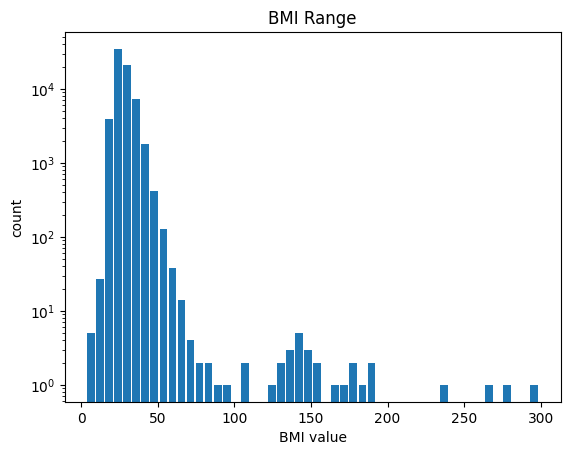

In [354]:
%matplotlib inline
plt.hist(df2['BMI'],bins=50,rwidth=0.85,log=True)
plt.title("BMI Range")
plt.xlabel("BMI value")
plt.ylabel("count")
plt.show()

**Lets Remove the outliers based on BMI**

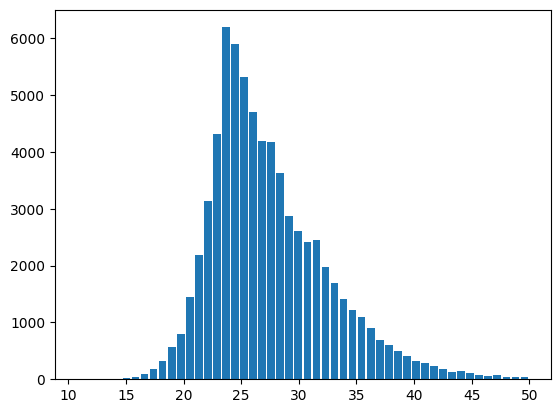

In [355]:
%matplotlib inline
df3 = df2[(df2['BMI']>10) & (df2['BMI']<50)]
plt.hist(df3['BMI'],bins=50,rwidth=0.85)
plt.show()

**Lets Check the correlation of each feature with target variable(cardio)**

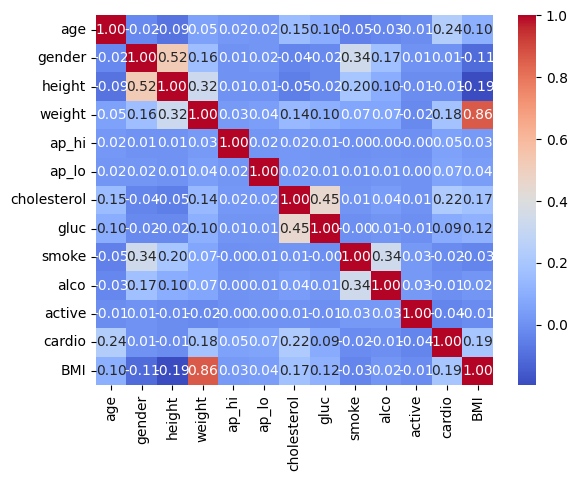

In [356]:
%matplotlib inline
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

* We can see that features are not having that much in correlation with target Variable(cardio)
* So we have to clean the data more

In [357]:
df3.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000,69749.000000
mean,52.801660,1.349984,164.447204,74.047538,128.793933,96.561815,1.366299,1.225709,0.088245,0.053779,0.803753,0.499176,27.412235
std,6.762833,0.476968,7.872900,13.991006,154.281679,188.546222,0.679820,0.571439,0.283653,0.225582,0.397160,0.500003,5.062378
min,29.000000,1.000000,98.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,49.980777


### Let analysis the ap_hi, ap_lo features

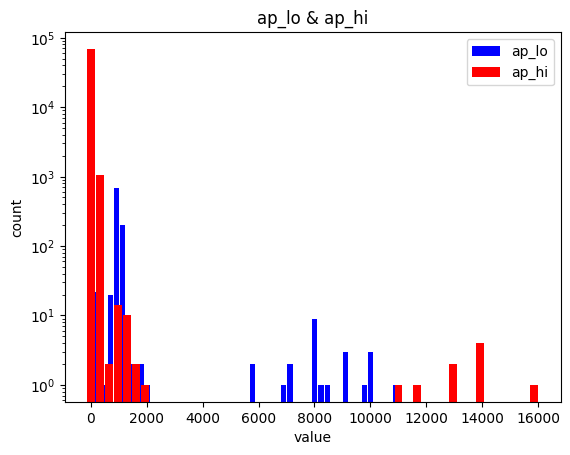

In [358]:
%matplotlib inline
plt.hist(df3['ap_lo'],bins=50,rwidth=0.85,color="blue",log=True,label="ap_lo")
plt.hist(df3['ap_hi'],bins=50,rwidth=0.85,color="red",log=True,label="ap_hi")
plt.legend()
plt.title("ap_lo & ap_hi")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

* **In general "ap_hi" and "ap_lo" is blood pressure of a person**
* **And ap_lo can't be higher than ap_hi**
* **But here the ap_hi and ap_lo are abnormally high, which is not practically possible, and in some cases ap_lo is high than ap_hi**
* **So lets set constraints to ap_hi and ap_lo**
* **Here we will consider max ap_hi is 300**

In [359]:
df4 = df3[(df3['ap_hi']<=300)]
df4 = df4[(df4['ap_lo'] <= df4['ap_hi']) & (df4['ap_lo']>10)]
df4

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


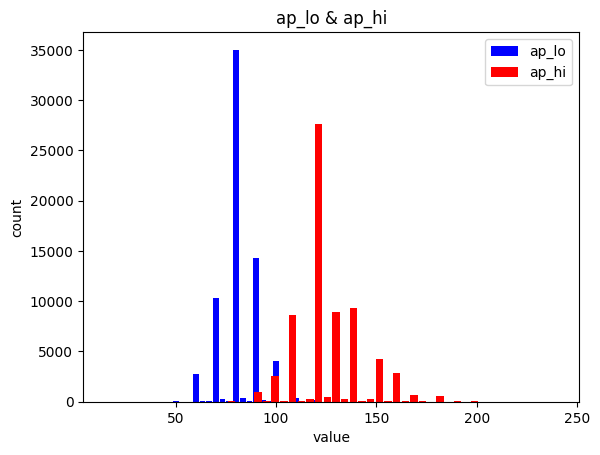

In [360]:
%matplotlib inline
plt.hist(df4['ap_lo'],bins=50,rwidth=0.85,color="blue",label="ap_lo")
plt.hist(df4['ap_hi'],bins=50,rwidth=0.85,color="red",label="ap_hi")
plt.legend()
plt.title("ap_lo & ap_hi")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

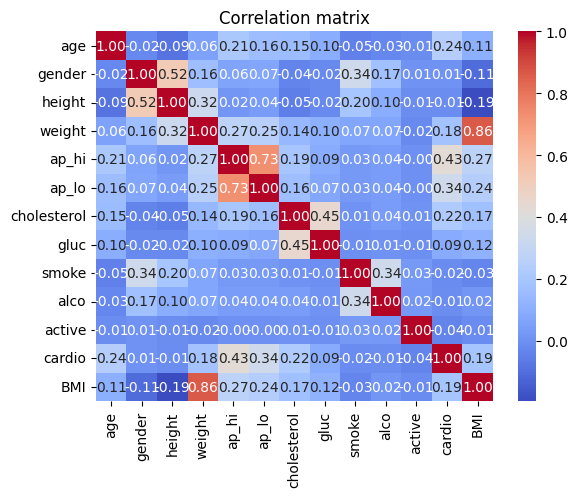

In [361]:
%matplotlib inline
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [362]:
df4.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [363]:
df4.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000,68455.000000
mean,52.789570,1.349032,164.447696,73.963376,126.640684,81.272135,1.364020,1.224921,0.088043,0.053349,0.803404,0.494237,27.380704
std,6.764889,0.476668,7.855393,13.937256,16.675035,9.499503,0.678396,0.570681,0.283360,0.224730,0.397427,0.499970,5.042791
min,29.000000,1.000000,120.000000,28.000000,24.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110991
max,64.000000,2.000000,250.000000,180.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,49.980777


### Lets check cholesterol feature

In [364]:
df4.cholesterol.unique()

array([1, 3, 2])

### **Cholesterol values**
* **1-normal**
* **2-above normal**
* **3-well above normal**
### **In general if a person have Cholesterol level above normal value ,the chances to have cardio diseases is high(cardio - 1)**
### **Therefore ,we will remove the rows where the cholesterol level is 3 but cardio is 1**

In [365]:
df5 = df4.drop(df4[(df4['cholesterol'] == 3) & (df4['cardio'] == 0)].index)
df5

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


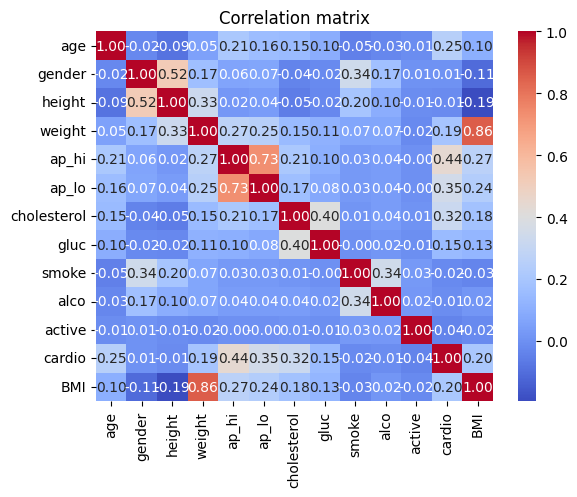

In [366]:
%matplotlib inline
correlation_matrix = df5.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [367]:
# df5 = df5.drop(df4[(df4['cholesterol'] == 1) & (df4['cardio'] == 1)].index)
# df5

df6 = df5.drop(df5[(df5['cholesterol'] == 1) & (df5['gluc'] == 1) & (df4['BMI'].between(18.5, 24.9)) & (df5['cardio'] == 1)].index)
df6


<ipython-input-367-35e742388360>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6 = df5.drop(df5[(df5['cholesterol'] == 1) & (df5['gluc'] == 1) & (df4['BMI'].between(18.5, 24.9)) & (df5['cardio'] == 1)].index)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


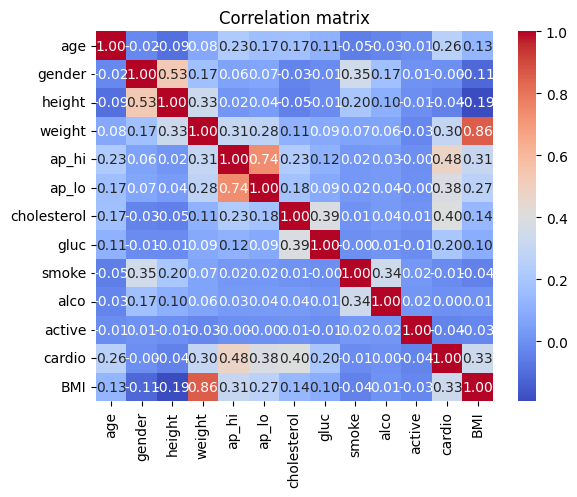

In [368]:
%matplotlib inline
correlation_matrix = df6.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()



### lets check gluc feature
#### **gluc values**
* **0-normal**
* **1-above normal**
* **2-well above normal**
* **In general same as Cholesterol ,if a person have gluc level above normal value ,the chances to  have cardio diseases is high(cardio - 1)**
* **Therefore ,we will remove the rows where the gluc level is 2 but cardio is 0**

In [369]:
df6.gluc.unique()

array([1, 2, 3])

In [370]:
df7 = df6.drop(df6[(df6['gluc']==2) & (df6['cardio']==0)].index)
df7

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


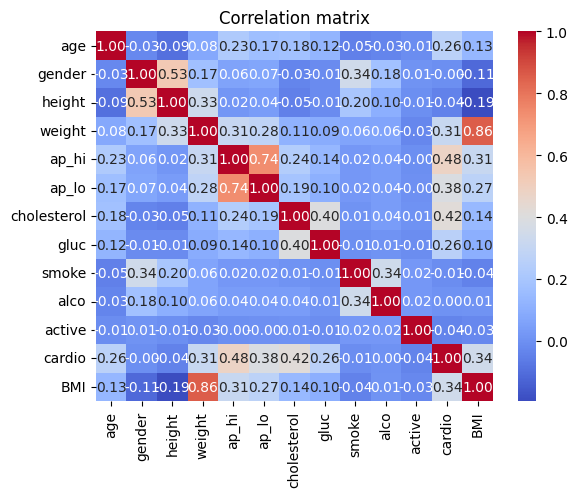

In [371]:
%matplotlib inline
correlation_matrix = df7.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [372]:
# df7 = df6.drop(df6[(df6['gluc']==1) & (df6['cardio']==1)].index)
# df7
# df7 = df6
df7

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


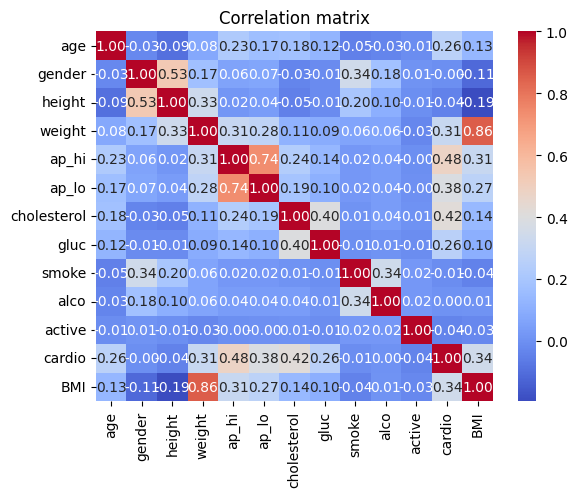

In [373]:
%matplotlib inline
correlation_matrix = df7.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [374]:
X = df7.drop(columns=['cardio'])
Y = df7['cardio']

In [375]:
print(f"y=0 :{len(Y[Y==0])}")
print(f"y=1 :{len(Y[Y==1])}")

y=0 :30776
y=1 :27064


In [376]:


smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
smote.fit(X,Y)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [377]:
print(f"y_resampled=0 :{len(y_resampled[y_resampled==0])}")
print(f"y_resampled=1 :{len(y_resampled[y_resampled==1])}")

y_resampled=0 :30776
y_resampled=1 :30776


# train-test split

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



# Model training

In [379]:
xgb_model = XGBClassifier(n_estimators=50, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)


In [380]:
hybrid_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='soft'  # 'soft' means it uses probability averaging, better for probabilities
)


In [381]:
# Train hybrid model
hybrid_model.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...ate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42))],
                 voting='soft')

# Prediction and Evaluation

In [382]:
y_pred = hybrid_model.predict(X_test)


In [383]:
print(classification_report(y_test, y_pred))
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      9235
           1       0.83      0.81      0.82      9231

    accuracy                           0.82     18466
   macro avg       0.82      0.82      0.82     18466
weighted avg       0.82      0.82      0.82     18466

Accuracy : 0.8204267302068666


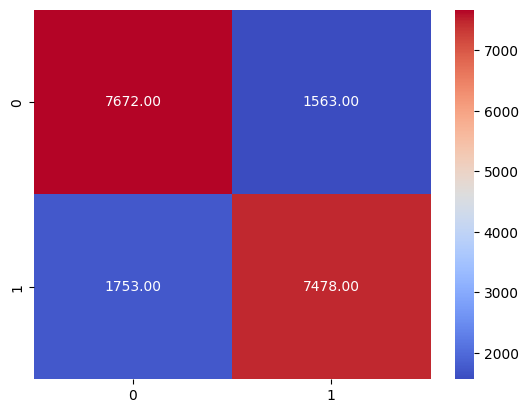

In [384]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [385]:
score_hybrid = cross_val_score(hybrid_model, df7.drop(columns=['cardio']), df7['cardio'])
print(score_hybrid)

[0.81751383 0.81950207 0.81172199 0.81639004 0.81699516]
